In [1]:
import os
import numpy as np
os.getcwd()
os.chdir(r'C:\Users\moham\Documents\pat_25302\adm_253102\rec_25300102')    #set where your data is placed

In [2]:
os.getcwd()

'C:\\Users\\moham\\Documents\\pat_25302\\adm_253102\\rec_25300102'

# Descrption of the data

1. Each file consists actually in a couple of files: the first one
    % contains the raw data stored in binary values (binary file); the
    % second one corresponds to a text file containing some parameters
    % about how the data was acquired and stored (header file).
    %         
    % 2. The parameters present in the header file (as it was decided in
    % the meeting in Coimbra on July 2009) are the following:
    % 
    % start_ts=<yyyy-mm-dd hh:mm:ss.microseconds>
    % num_samples=<int>
    % sample_freq=<int>
    % conversion_factor=<float>
    % num_channels:=<int>
    % (optional)elec_names=<string>, ...  (e.g. FP1,FP2)
    % (opt.)pat_id=<int>
    %
    % 3. The binary file is organized as follows:
    %
    % - Each sample (data value) in the file is stored in 2 bytes, signed.
    % (“short” type in C, “int16” in MATLAB)
    % - The firsts 2 bytes in the file correspond to the value of the first
    % sample for the first channel, the next 2 to the value of the first
    % sample for the second channel and so on until the first sample for
    % the last channel (according to parameter “num_channels” above). After
    % the first sample for all channels, the next series will be the second
    % sample for each progressive channel and the sequence continues until
    % the end of the file.
    %
    % EU FP7 Grant 211713 (EPILEPSIAE)
    %
    % Mario Valderrama
    % PARIS - CRNRS
    % September 2009

# Reading the Meta data for block02  (format .Head)

In [3]:
g=open('25300102_0003.head',"r")  #reading metadata(head file) with name of the data , It works
for c in g:
    print(c)


start_ts=2004-03-15 20:17:56.000

num_samples=1843200

sample_freq=512

conversion_factor=0.165000

num_channels=31

elec_names=[HRA1,HRA2,HRA3,HRA4,HRA5,HRB1,HRB2,HRB3,HRB4,HRB5,HRC1,HRC2,HRC3,HRC4,HRC5,HLA1,HLA2,HLA3,HLA4,HLA5,HLB1,HLB2,HLB3,HLB4,HLB5,HLC1,HLC2,HLC3,HLC4,HLC5,ECG]

pat_id=25302

adm_id=253102

rec_id=25300102

duration_in_sec=3600

sample_bytes=2



# Reading the main file which is EEG for one hour or 3600 seconds (.data format)

In [5]:
data_int=[]
with open("25300102_0003.data", 'rb') as file:
    for byte in iter(lambda: file.read(2), b''):
        data=int.from_bytes(byte,'little',signed=True)
        data_int.append(data)     

In [6]:
data_array=np.asarray(data_int)

In [7]:
print(data_array.shape)
data_channel=data_array.reshape(1843200,31)
print(data_channel.shape)
#Number of samples is 1843200 which is for 3600(s) * 512(f) 
#here length of my list is 57139200= 1843200* 31 which shows at least we decode binary file to the numbers of correct samples ! the next question is that do we decoded in corredt way


(57139200,)
(1843200, 31)


[ -61 -204 -199 ...  525  459  296]


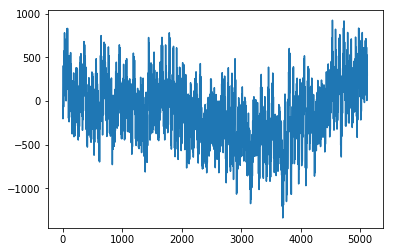

In [8]:
#Value of first channel for 1 second for the block 25300102_0003
import matplotlib.pyplot as plt 
plt.plot(data_channel[0:5120,0])
print(data_channel[0:5120,0])
plt.show()

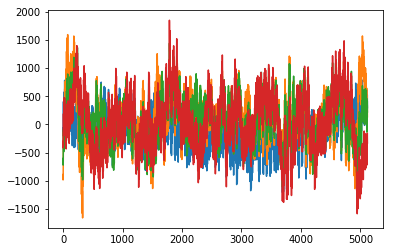

[[ -61 -891 -606 -302  193]
 [-204 -986 -723 -419  122]
 [-199 -933 -717 -405  156]
 ...
 [ 525  339  416 -156 -371]
 [ 459  278  363 -205 -412]
 [ 296  135  220 -330 -575]]


In [9]:
  plt.plot(data_channel[0:5120,0:4])
plt.show()
y=data_channel[0:5120,0:5]
print(y)

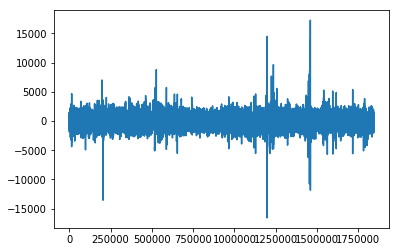

[[ -61 -891 -606 -302]
 [-204 -986 -723 -419]
 [-199 -933 -717 -405]
 ...
 [ 525  339  416 -156]
 [ 459  278  363 -205]
 [ 296  135  220 -330]]


In [11]:
 plt.plot(data_channel[:,15])
plt.show()
y=data_channel[0:5120,0:4]
print(y)

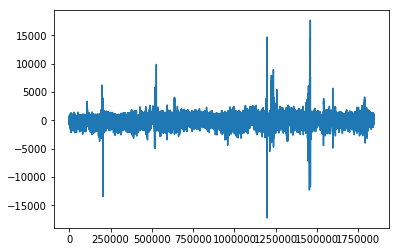

In [34]:
 plt.plot(data_channel[:,29])
plt.show()


In [19]:
number = 128
bytestring = number.to_bytes(2, 'little')
print("integer {int} in bytes is {bytes}".format(int=number, bytes=bytestring))


integer 128 in bytes is b'\x80\x00'


In [20]:
number = 128
bytestring = number.to_bytes(2, 'big')
print("integer {int} in bytes is {bytes}".format(int=number, bytes=bytestring))

integer 128 in bytes is b'\x00\x80'


   <lo> base on this example, Question maybe here is  that which decoding should I use? 

In [2]:
%load_ext sql

In [3]:
cd

C:\Users\moham


In [7]:
fd = open('pat_25302_2013-01-21.sql', 'r')
sqlFile = fd.read()
fd.close()

In [8]:
print(sqlFile)

-- pat_25302_2013-01-21.sql

INSERT INTO patient (id, patientcode, gender, onsetage, commentary) VALUES (25302, 'FR_253', 'f', 18, NULL);
INSERT INTO admission (id, patient, adm_date, age, hospital, presurgical, surgicaldecision, seeg, ieeg, commentary) VALUES (253102, 25302, '2004-03-15 00:00:00', 37, 'UKLFR', TRUE, 's', TRUE, TRUE, '-');
INSERT INTO etiology (id, vascular_hypoxia, trauma, inflammation, malformation, hippocampal_sclerosis, degeneration, tumor, idiopathic, cns_surgery, genetic_risk, other) VALUES (253102, FALSE, FALSE, FALSE, FALSE, TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, NULL);
INSERT INTO pet (id, hypometabolism) VALUES (253102, 'r');
INSERT INTO mri (id, mri_date, hippocampal_atrophy, hippocampal_intensity_incr, hippocampal_malrotation, hippocampal_tumor, amygdala_atrophy, amygdala_intensity_incr, amygdala_tumor, temp_lobe_intensity_incr, gray_white_matter_blurring, cavernoma, angioma, aneurysma, venous_dysplasia, dural_fistula, other_vessel_malformation, tumor, co